### Finemapping using susieR



Data preparation


In [1]:
import gwaslab as gl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Load sumstats

In [2]:
sumstats = gl.Sumstats("./1kgeas.B1.glm.firth.gz",fmt="plink2")

2025/03/23 05:17:45 GWASLab v3.5.5 https://cloufield.github.io/gwaslab/
2025/03/23 05:17:45 (C) 2022-2025, Yunye He, Kamatani Lab, GPL-3.0 license, gwaslab@gmail.com
2025/03/23 05:17:45 Start to load format from formatbook....
2025/03/23 05:17:45  -plink2 format meta info:
2025/03/23 05:17:45   - format_name  : PLINK2 .glm.firth, .glm.logistic,.glm.linear
2025/03/23 05:17:45   - format_source  : https://www.cog-genomics.org/plink/2.0/formats
2025/03/23 05:17:45   - format_version  : Alpha 3.3 final (3 Jun)
2025/03/23 05:17:45   - last_check_date  :  20220806
2025/03/23 05:17:45  -plink2 to gwaslab format dictionary:
2025/03/23 05:17:45   - plink2 keys: ID,#CHROM,POS,REF,ALT,A1,OBS_CT,A1_FREQ,BETA,LOG(OR)_SE,SE,T_STAT,Z_STAT,P,LOG10_P,MACH_R2,OR
2025/03/23 05:17:45   - gwaslab values: SNPID,CHR,POS,REF,ALT,EA,N,EAF,BETA,SE,SE,T,Z,P,MLOG10P,INFO,OR
2025/03/23 05:17:45 Start to initialize gl.Sumstats from file :./1kgeas.B1.glm.firth.gz
2025/03/23 05:17:47  -Reading columns          : OR,R

#### Data standardization and sanity check

In [3]:
sumstats.basic_check()

2025/03/23 05:30:19 Start to check SNPID/rsID...v3.5.5
2025/03/23 05:30:19  -Current Dataframe shape : 1128732 x 14 ; Memory usage: 108.66 MB
2025/03/23 05:30:19  -Checking SNPID data type...
2025/03/23 05:30:19  -Converting SNPID to pd.string data type...
2025/03/23 05:30:19  -Checking if SNPID is CHR:POS:NEA:EA...(separator: - ,: , _)
2025/03/23 05:30:23 Finished checking SNPID/rsID.
2025/03/23 05:30:23 Start to fix chromosome notation (CHR)...v3.5.5
2025/03/23 05:30:23  -Current Dataframe shape : 1128732 x 14 ; Memory usage: 108.66 MB
2025/03/23 05:30:23  -Checking CHR data type...
2025/03/23 05:30:23  -Variants with standardized chromosome notation: 1128732
2025/03/23 05:30:23  -All CHR are already fixed...
2025/03/23 05:30:25 Finished fixing chromosome notation (CHR).
2025/03/23 05:30:25 Start to fix basepair positions (POS)...v3.5.5
2025/03/23 05:30:25  -Current Dataframe shape : 1128732 x 14 ; Memory usage: 108.66 MB
2025/03/23 05:30:25  -Converting to Int64 data type ...
2025/0

#### Extract lead variants

In [4]:
sumstats.get_lead()

2025/03/23 05:36:40 Start to extract lead variants...v3.5.5
2025/03/23 05:36:40  -Current Dataframe shape : 907939 x 14 ; Memory usage: 89.87 MB
2025/03/23 05:36:40  -Processing 907939 variants...
2025/03/23 05:36:40  -Significance threshold : 5e-08
2025/03/23 05:36:40  -Sliding window size: 500  kb
2025/03/23 05:36:40  -Using P for extracting lead variants...
2025/03/23 05:36:40  -Found 43 significant variants in total...
2025/03/23 05:36:40  -Identified 4 lead variants!
2025/03/23 05:36:40 Finished extracting lead variants.


,SNPID,CHR,POS,EA,NEA,EAF,SE,Z,P,OR,N,STATUS,REF,ALT
44298,1:167562605:G:A,1,167562605,A,G,0.391481,0.159645,7.69462,1.419150e-14,3.415780,493,9960099,G,A
91266,2:55513738:C:T,2,55513738,C,T,0.376008,0.153159,-7.96244,1.686760e-15,0.295373,496,9960099,C,T
442239,7:134368632:T:G,7,134368632,G,T,0.138105,0.225526,6.89025,5.569440e-12,4.730010,496,9960099,T,G
875859,20:42758834:T:C,20,42758834,T,C,0.227273,0.184323,-7.76902,7.909780e-15,0.238829,495,9960099,T,C


#### Create manhattan plot for checking

2025/03/23 05:48:33 Start to create MQQ plot...v3.5.5:
2025/03/23 05:48:33  -Genomic coordinates version: 99...
2025/03/23 05:48:33  #WARNING! Genomic coordinates version is unknown.
2025/03/23 05:48:33  -Genome-wide significance level to plot is set to 5e-08 ...
2025/03/23 05:48:33  -Raw input contains 907939 variants...
2025/03/23 05:48:33  -MQQ plot layout mode is : mqq
2025/03/23 05:48:34 Finished loading specified columns from the sumstats.
2025/03/23 05:48:34 Start data conversion and sanity check:
2025/03/23 05:48:34  -Removed 0 variants with nan in CHR or POS column ...
2025/03/23 05:48:34  -Removed 0 variants with CHR <=0...
2025/03/23 05:48:34  -Removed 0 variants with nan in P column ...
2025/03/23 05:48:34  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
2025/03/23 05:48:34  -Sumstats P values are being converted to -log10(P)...
2025/03/23 05:48:34  -Sanity check: 0 na/inf/-inf variants will be removed...
2025/03/23 05:48:34  -Con

(<Figure size 3000x1000 with 2 Axes>, <gwaslab.g_Log.Log at 0x725dc56f0ee0>)

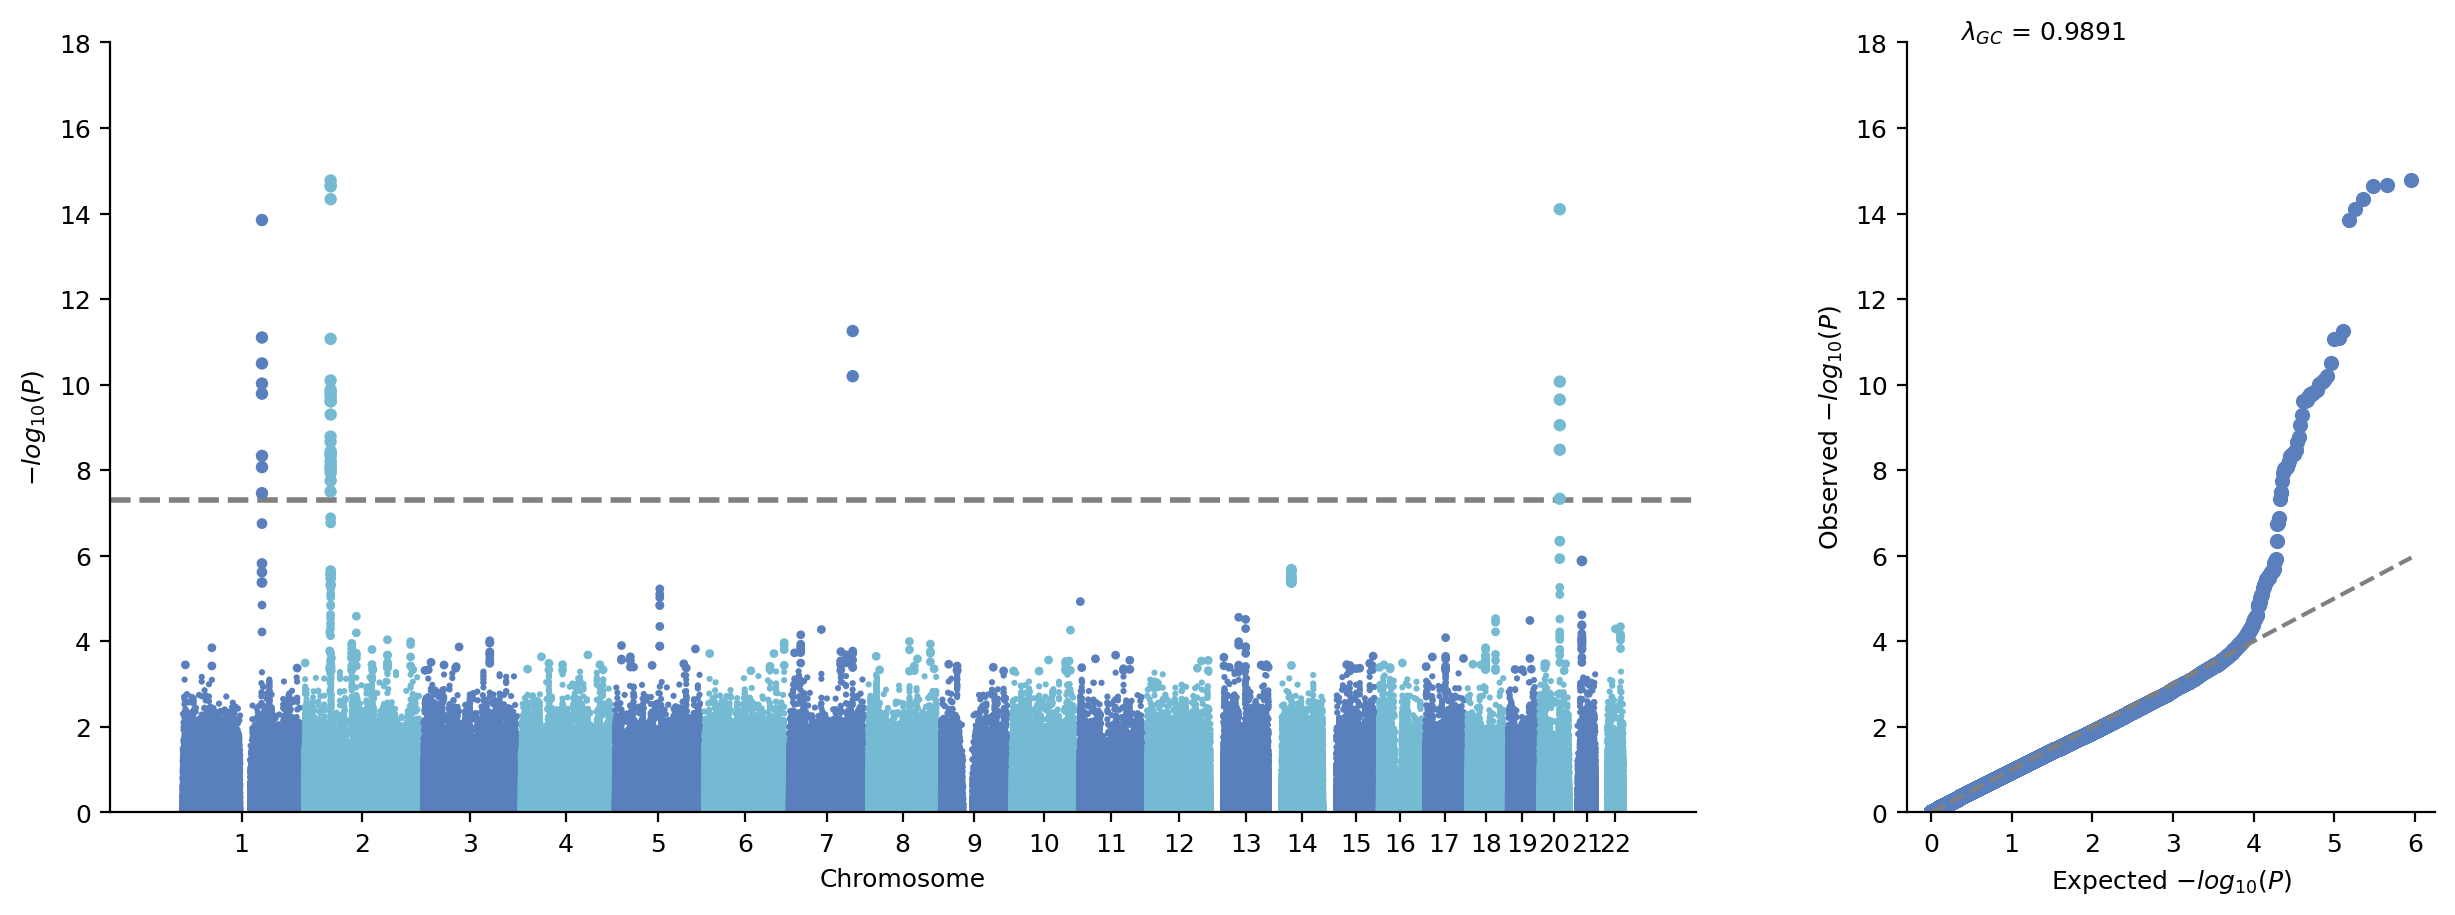

In [5]:
sumstats.plot_mqq()